<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/supervised/decission_tree_regression/06_decission_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install scikit-learn

In [2]:
! pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


### Spis tresci:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Regresja liniowa](#2)
4. [Regresja drzew decyzyjnych](#3)
5. [Graf drzewa decyzyjnego](#4)
6. [Model drzewa decyzyjnego - budowa funkcji](#5)

### <a name='0'></a> Import bibliotek

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6,suppress=True)
sklearn.__version__

'1.7.2'

### <a name='1'></a> Wygenerowanie danych

In [4]:
data, target = make_regression(n_samples=200, n_features=1, noise = 20)
target = target**2

print(f'{data[:5]}\n')
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


### <a name='2'></a> Regresja liniowa

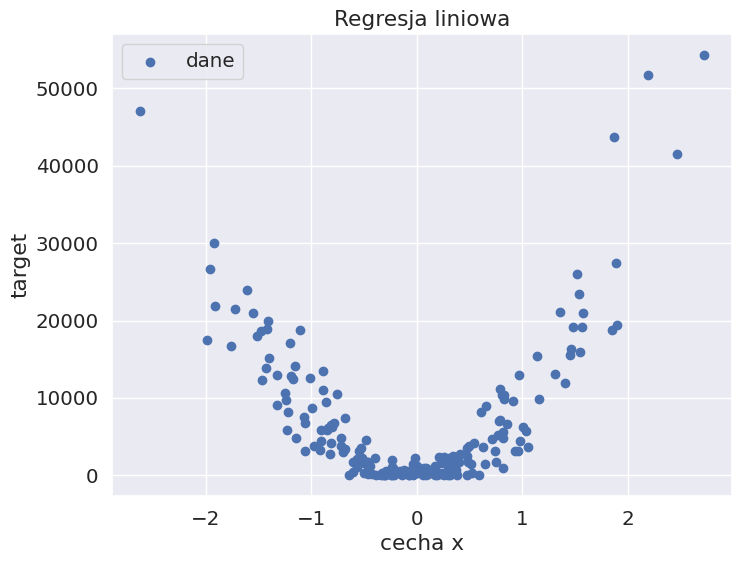

In [5]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

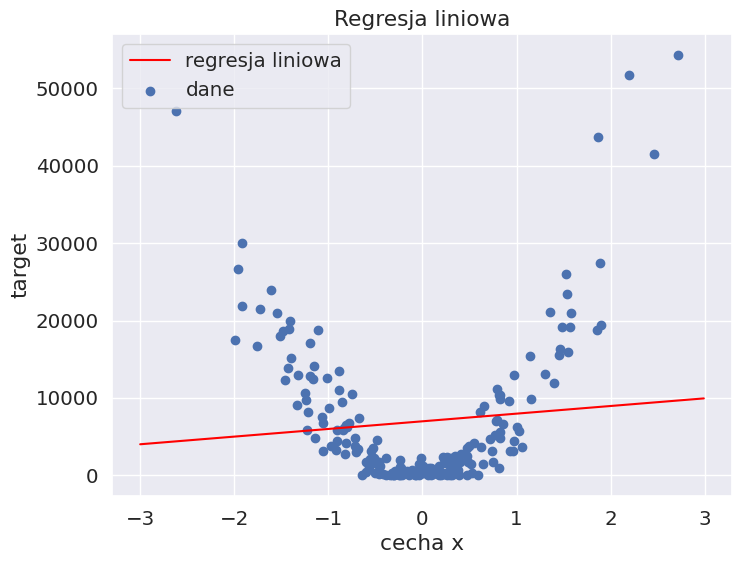

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data,target)

plot_data = np.arange(-3,3,0.01).reshape(-1,1)

plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

### <a name='3'></a> Regresja drzew decyzyjnych

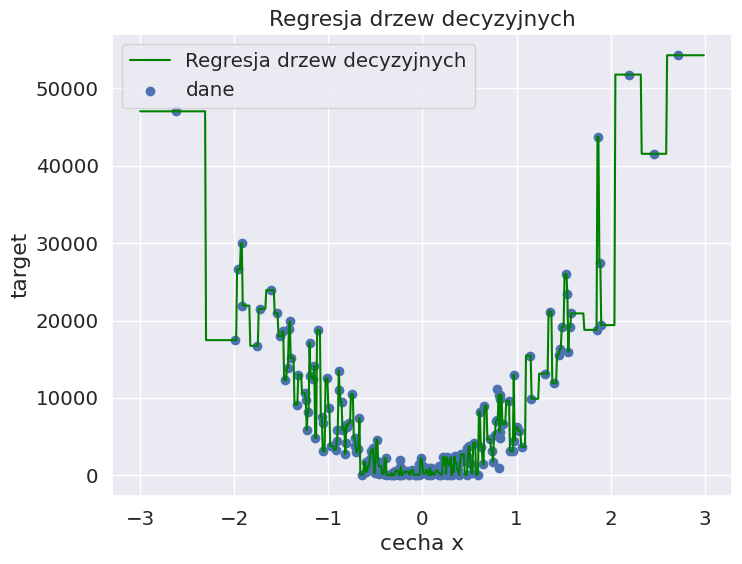

In [8]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'Regresja drzew decyzyjnych')
plt.scatter(data,target,label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

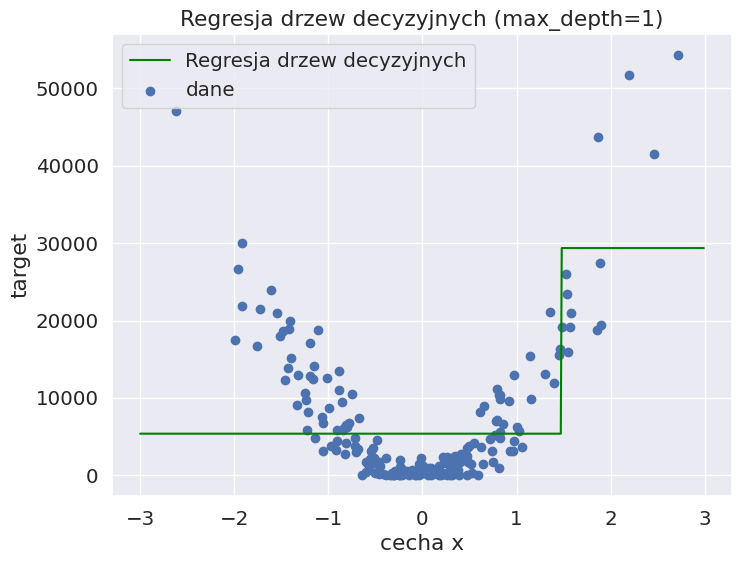

In [10]:
max_depth=1
regressor=DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title(f'Regresja drzew decyzyjnych (max_depth={max_depth})')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'Regresja drzew decyzyjnych')
plt.scatter(data,target,label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

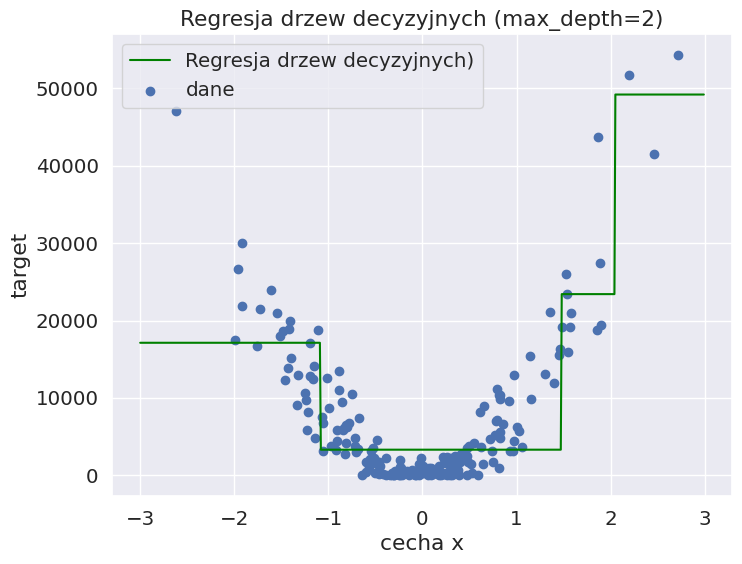

In [12]:
max_depth=2
regressor=DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title(f'Regresja drzew decyzyjnych (max_depth={max_depth})')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'Regresja drzew decyzyjnych)')
plt.scatter(data,target,label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

### <a name='4'></a> Graf drzewa decyzyjnego

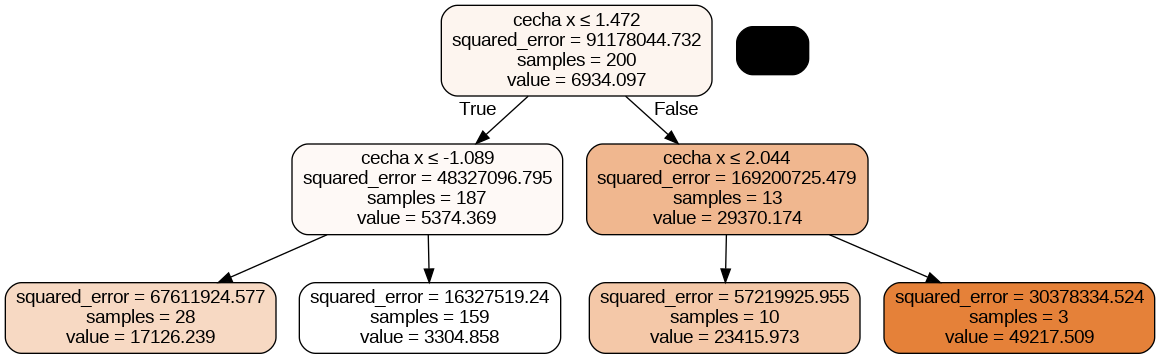

In [17]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('graph.png')

Image(graph.create_png(), width=600)


### <a name='5'></a> Model drzewa decyzyjnego - budowa funkcji

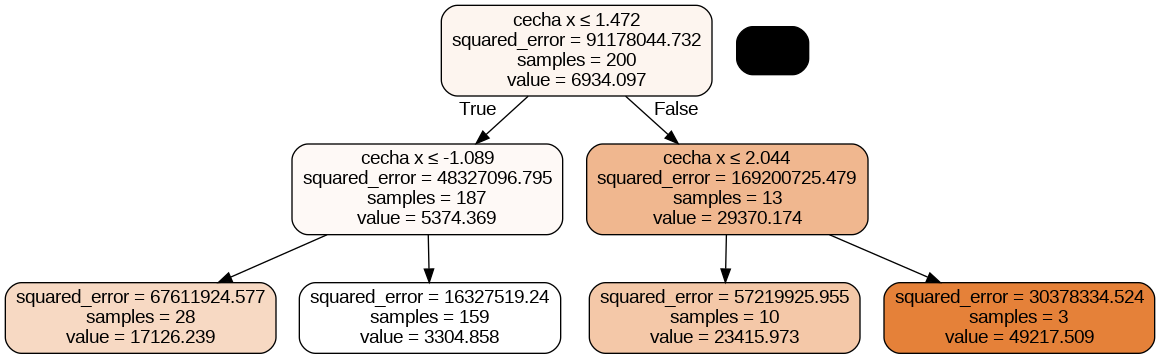

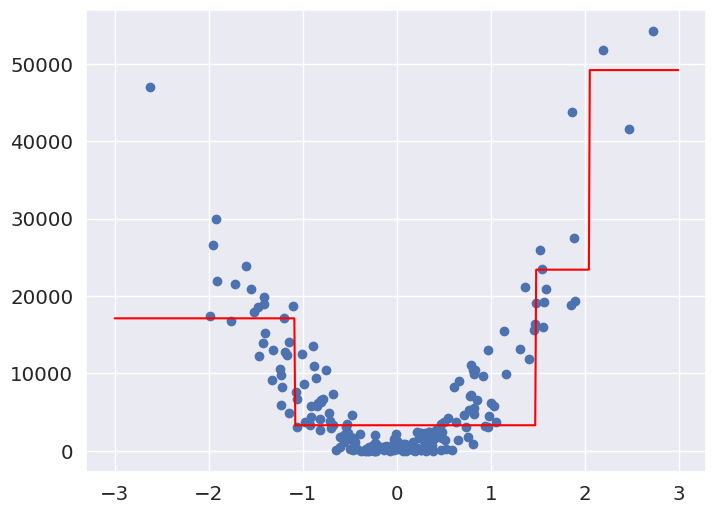

In [20]:
def make_dt_regression(max_depth=2):
  regressor = DecisionTreeRegressor(max_depth=max_depth)
  regressor.fit(data, target)

  plt.figure(figsize=(8,6))
  plt.plot(plot_data, regressor.predict(plot_data), c='red')
  plt.scatter(data, target)

  dot_data = StringIO()
  export_graphviz(regressor, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names=['cecha x'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  return Image(graph.create_png(), width=300 + max_depth*100)

make_dt_regression(max_depth=2)

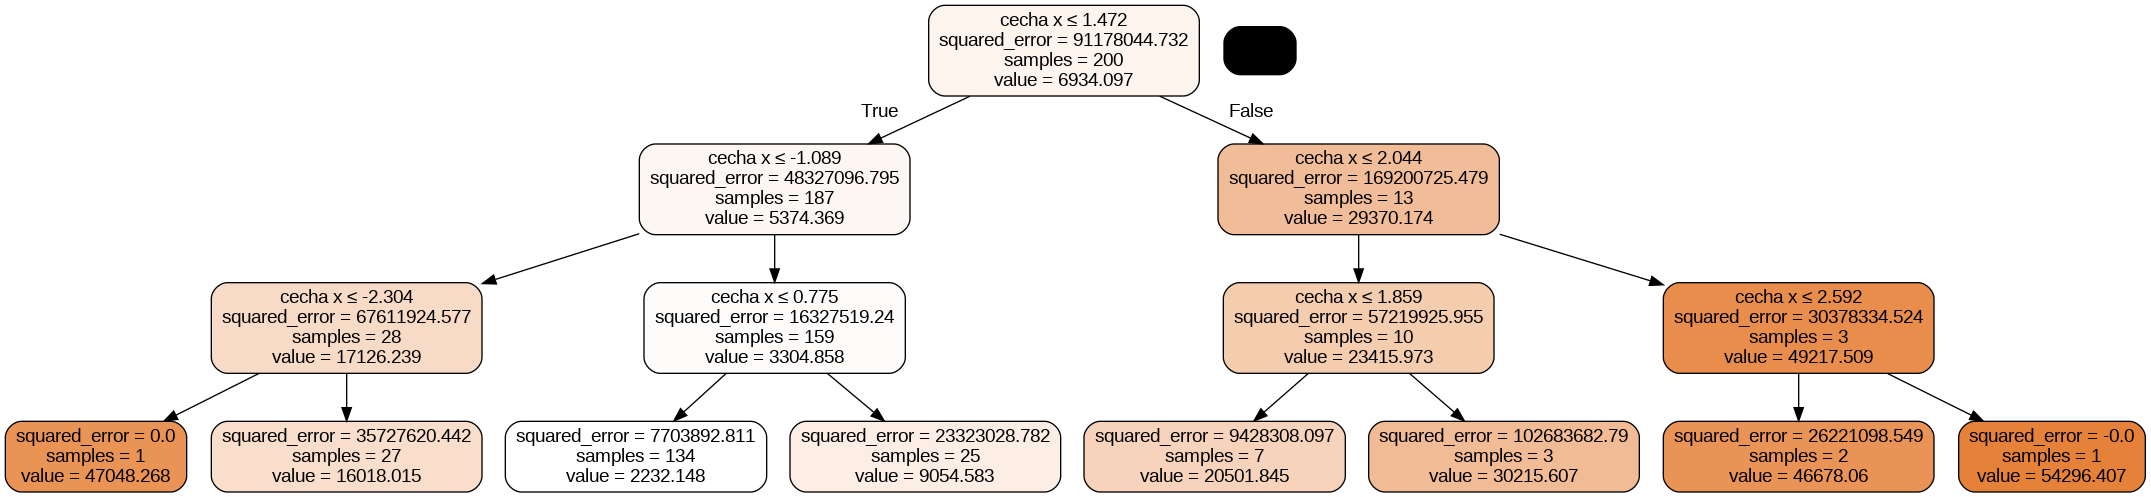

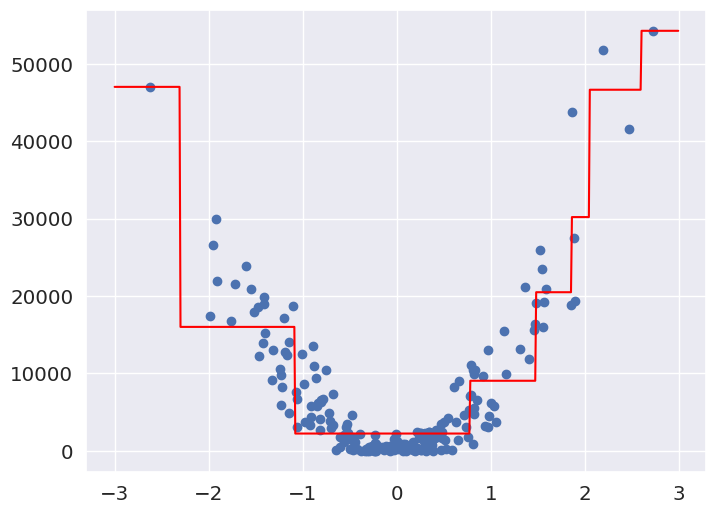

In [21]:
make_df_regression(max_depth=3)

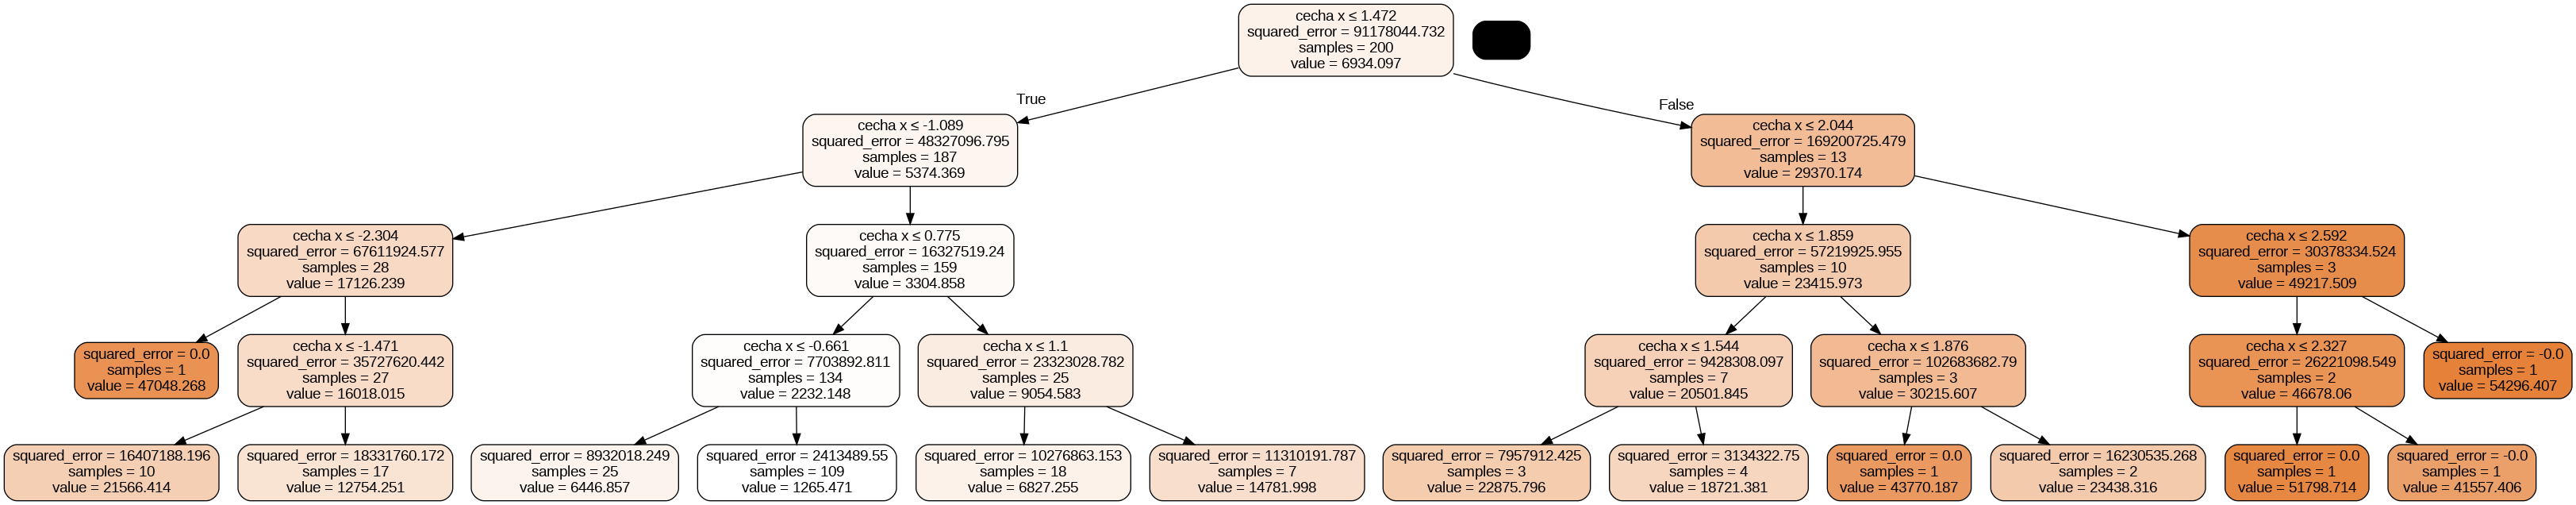

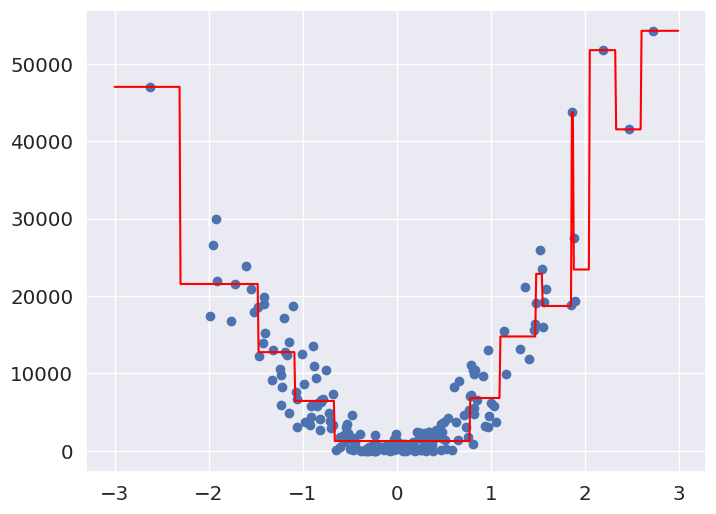

In [22]:
make_df_regression(max_depth=4)